<h2 align="center">EDA_Details</h2>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sn

pd.set_option('display.max_columns', None)

NIA-R: The modified NIA-Reagan diagnosis of Alzheimer's disease is based on consensus recommendations for postmortem diagnosis of Alzheimer's disease. The criteria rely on both neurofibrillary tangles (Braak) and neuritic plaques (CERAD).

LB stage: Lewy body dementia, also known as dementia with Lewy bodies, is the second most common type of progressive dementia after Alzheimer's disease dementia. Protein deposits, called Lewy bodies, develop in nerve cells in the brain regions involved in thinking, memory and movement (motor control).

Braak staging refers to two methods used to classify the degree of pathology in Parkinson's disease and Alzheimer's disease. These methods are used both in research and for the clinical diagnosis of these diseases and are obtained by performing an autopsy of the brain.

In [69]:
features = ['expired_age', 'sex', 'PMI', 'sn_depigmentation', 'Braak score', 'TangleTotal', 'Plaque density', 
            'PlaqueTotal', 'CONDITION', 'BIOFLUID', 'TRANSCRIPTOME READS', 'REFERENCE GENOME READS', 
            'TRANSCRIPTOME GENOME RATIO', 'PlaqueF', 'PlaqueT', 'PlaqueH', 'PlaqueE', 'TangleF', 
            'TangleT', 'TangleH', 'TangleE', 'NIA-R', 'LB Stage', 'Run']

In [70]:
sra = pd.read_csv('../test/testdata/SraRunTable.csv', usecols=features)
sra.head()

,CONDITION,BIOFLUID,TRANSCRIPTOME READS,REFERENCE GENOME READS,TRANSCRIPTOME GENOME RATIO,expired_age,PMI,PlaqueF,PlaqueT,PlaqueH,PlaqueE,PlaqueTotal,Plaque density,TangleF,TangleT,TangleH,TangleE,TangleTotal,Braak score,NIA-R,LB Stage,sn_depigmentation,Run,sex
0,Healthy Control,Cerebrospinal fluid,6883461,6923368,0.994236,94,2.50,3.0,3.00,3.0,3.0,15.00,frequent,1.0,3.00,3.0,3.0,12.00,IV,criteria not met,No Lewy bodies,none,SRR1568567,male
1,Parkinson's Disease,Serum,2904451,2953867,0.983271,79,6.00,0.0,1.75,0.0,0.0,2.75,sparse,0.0,0.75,1.5,1.0,3.25,II,criteria not met,Limbic type,severe,SRR1568730,female
2,Alzheimer's Disease,Serum,12132405,12781881,0.949188,81,2.50,2.5,2.50,2.5,2.0,11.50,frequent,1.6,2.50,3.0,3.0,11.10,V,high,No Lewy bodies,mild,SRR1568666,female
3,Parkinson's Disease,Cerebrospinal fluid,5560256,5622788,0.988879,79,2.50,1.5,2.00,1.0,1.5,7.50,moderate,0.0,0.50,1.0,1.5,3.00,II,low,Neocortical type,severe,SRR1568510,male
4,Parkinson's Disease,Cerebrospinal fluid,12131859,12219540,0.992825,82,4.16,0.0,0.00,0.0,0.0,0.00,zero,0.0,0.50,3.0,3.0,6.50,III,criteria not met,Limbic type,severe,SRR1568518,female


In [81]:
# only 2 duplicate run ID, maybe don't include this in the report?
len(sra) - len(sra['Run'].unique())

2

In [84]:
# distribution of NIA-R droken down by conditions
nia_r = sra.groupby(['CONDITION', 'NIA-R'])['Run'].count().to_frame().rename(columns={'Run': 'Count'})
nia_r

Count
CONDITION           NIA-R                  
Alzheimer's Disease high                 82
                    intermediate         23
                    low                   5
Healthy Control     criteria not met    124
                    not AD                2
Parkinson's Disease criteria not met     45
                    high                  1
                    intermediate         39
                    low                  18
                    not AD                4

In [83]:
# distribution of LB Stage broken down by conditions
lb_mapper = {'LB pathology unspecified or not further assessed': 'unspecified', np.nan: 'N/A'}
sra['LB Stage'] = sra['LB Stage'].replace(lb_mapper)
lb_stage = sra.groupby(['CONDITION', 'LB Stage'])['Run'].count().to_frame().rename(columns={'Run': 'Count'})
lb_stage

Count
CONDITION           LB Stage                         
Alzheimer's Disease N/A                             3
                    No Lewy bodies                 93
                    unspecified                    14
Healthy Control     N/A                             1
                    No Lewy bodies                124
                    unspecified                     1
Parkinson's Disease Brainstem predominant type     11
                    Limbic type                    53
                    Neocortical type               41
                    unspecified                     2

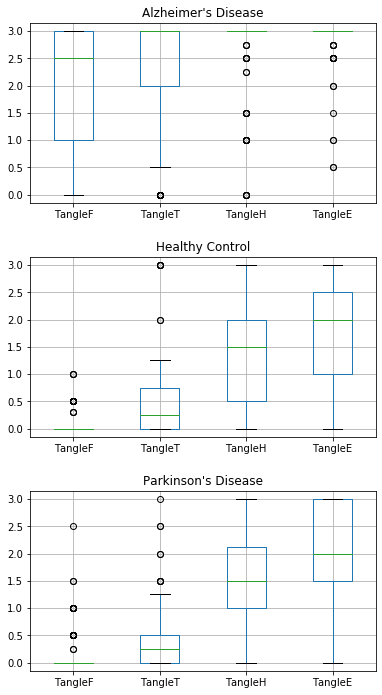

In [53]:
# Tangle counts distribution in each brain region broken down by contidions
plaques = sra[['CONDITION', 'TangleF', 'TangleT', 'TangleH', 'TangleE']]
plaques.groupby('CONDITION').boxplot(figsize=(6, 12), layout=(3, 1))
plt.subplots_adjust(hspace = 0.3)

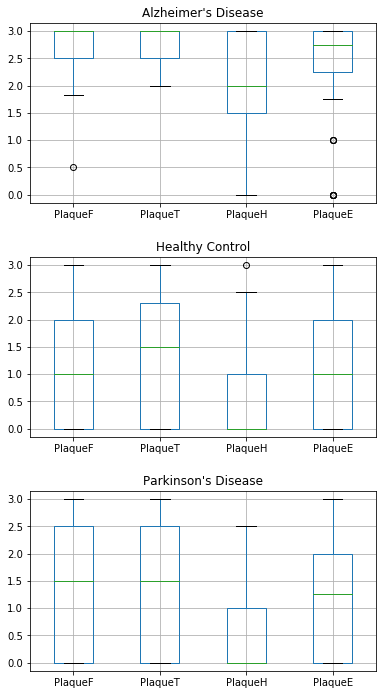

In [52]:
# Plaque counts distribution in each brain region broken down by contidions
plaques = sra[['CONDITION', 'PlaqueF', 'PlaqueT', 'PlaqueH', 'PlaqueE']]
plaques.groupby('CONDITION').boxplot(figsize=(6, 12), layout=(3, 1))
plt.subplots_adjust(hspace = 0.3)

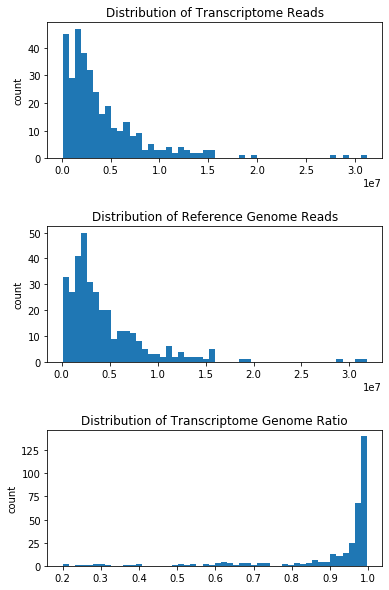

In [33]:
# Distributions of reads of all samples
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.hist(sra['TRANSCRIPTOME READS'], bins=50)
ax1.set_title('Distribution of Transcriptome Reads')
ax1.set_ylabel('count')
ax2.hist(sra['REFERENCE GENOME READS'], bins=50)
ax2.set_title('Distribution of Reference Genome Reads')
ax2.set_ylabel('count')
ax3.hist(sra['TRANSCRIPTOME GENOME RATIO'], bins=50)
ax3.set_title('Distribution of Transcriptome Genome Ratio')
ax3.set_ylabel('count')
fig.subplots_adjust(hspace = 0.5)
fig.set_figheight(10)

Text(0.5, 1.0, "Substantia Nigra Depigmentation Score Distribution of Healthy, Alzheimer's, and Parkinson's samples")

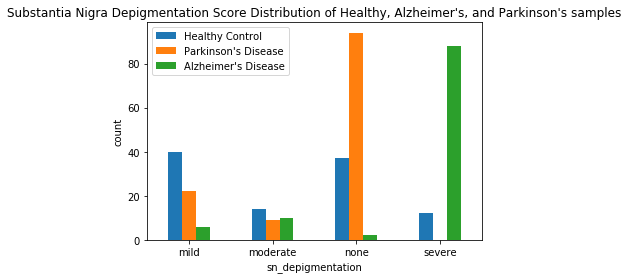

In [34]:
# sn depigmentation distributions broken down by conditions
conditions = sra.CONDITION.unique()
sn_dp = sra.groupby(['sn_depigmentation', 'CONDITION']).size().to_frame()
sn_dp.unstack().plot(kind='bar')
plt.legend(conditions)
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.title('Substantia Nigra Depigmentation Score Distribution of Healthy, Alzheimer\'s, and Parkinson\'s samples')

In [5]:
# redundant features?
# boxplot?
# distributions of plaque total values correspond to each plaque density category
pd.DataFrame(group.describe().rename(columns={'PlaqueTotal':name}).squeeze()  for name, group in sra[['Plaque density', 'PlaqueTotal']].groupby('Plaque density'))


,count,mean,std,min,25%,50%,75%,max
frequent,115.0,13.227217,1.813332,6.50,12.915,13.50,14.875,15.00
moderate,95.0,9.539579,2.865883,1.75,7.250,9.75,11.500,14.25
sparse,47.0,5.507447,3.395009,0.50,2.475,5.30,7.500,12.00
zero,86.0,0.462209,1.685805,0.00,0.000,0.00,0.000,12.75


Text(0.5, 1.0, "Braak Score Distribution of Healthy, Alzheimer's, and Parkinson's samples")

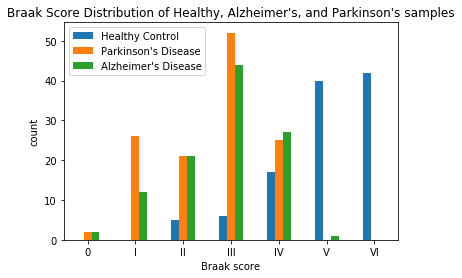

In [35]:
#braak distribution
conditions = sra.CONDITION.unique()
bs_cnts = sra.groupby(['Braak score','CONDITION']).size().to_frame()
bs_cnts.unstack().plot(kind='bar')
plt.legend(conditions)
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.title('Braak Score Distribution of Healthy, Alzheimer\'s, and Parkinson\'s samples')

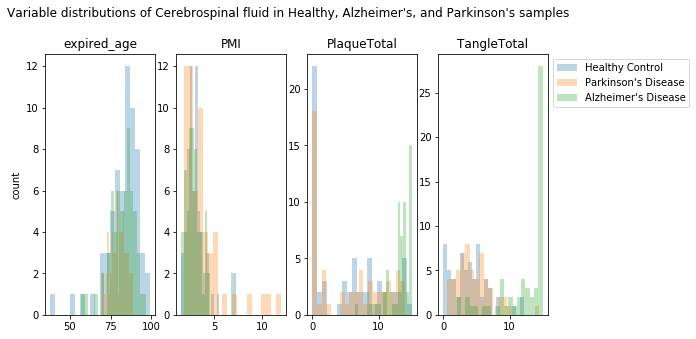

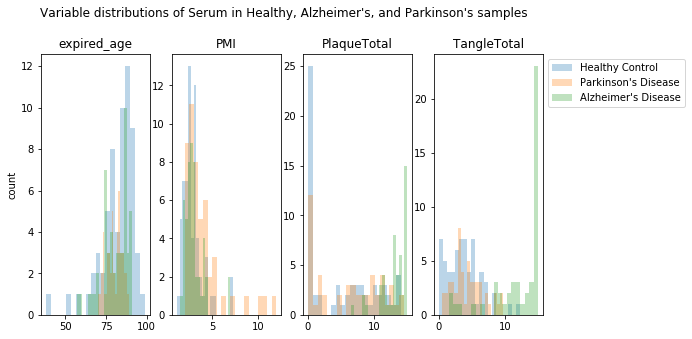

In [39]:
# numerical variables distribution
conditions = sra.CONDITION.unique()
biofluids = sra.BIOFLUID.unique()
num_bins = 20
variables = ['expired_age', 'PMI', 'PlaqueTotal', 'TangleTotal']
for i in biofluids:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    fig.set_figheight(5)
    fig.set_figwidth(9)
    ax_arr = [ax1, ax2, ax3, ax4]
    fig.suptitle('Variable distributions of %s in Healthy, Alzheimer\'s, and Parkinson\'s samples' % i)
    fig.subplots_adjust(top=0.85)
    for j in conditions:
        for k in range(len(variables)):
            data = sra.loc[(sra['CONDITION']==j) & (sra['BIOFLUID']==i)][variables[k]]
            ax = ax_arr[k]
            ax.hist(data, bins=num_bins,label=j, alpha = 0.3)
            ax.set_title(variables[k])
            if k==0:
                ax.set_ylabel('count')
        ax.legend(bbox_to_anchor=(1, 1))
            
            

In [19]:
# Correlation of plaque total and tangle total break-down
sra.groupby('CONDITION')[['PlaqueTotal', 'TangleTotal']].corr()

PlaqueTotal  TangleTotal
CONDITION                                                
Alzheimer's Disease PlaqueTotal     1.000000     0.678682
                    TangleTotal     0.678682     1.000000
Healthy Control     PlaqueTotal     1.000000     0.424932
                    TangleTotal     0.424932     1.000000
Parkinson's Disease PlaqueTotal     1.000000     0.491109
                    TangleTotal     0.491109     1.000000

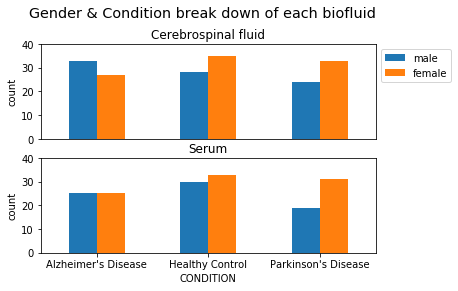

In [41]:
#sample break-down
cnt_summary_CSF = sra[sra['BIOFLUID']=='Cerebrospinal fluid'][['CONDITION', 'BIOFLUID', 'sex']].groupby(['CONDITION', 'sex']).count().unstack()
cnt_summary_serum = sra[sra['BIOFLUID']=='Serum'][['CONDITION', 'BIOFLUID', 'sex']].groupby(['CONDITION', 'sex']).count().unstack()
fig, (ax1, ax2) = plt.subplots(2, 1)
cnt_summary_CSF.plot.bar(ax = ax1)
ax1.legend(['male', 'female'], bbox_to_anchor=(1, 1))
ax1.set_title('Cerebrospinal fluid')
ax1.set_ylim(0,40)
ax1.set_ylabel('count')
ax1.xaxis.set_visible(False)

cnt_summary_serum.plot.bar(ax = ax2)
ax2.set_title('Serum')
ax2.legend().remove()
ax2.set_ylim(0,40)
ax2.set_ylabel('count')
plt.xticks(rotation = 0)
fig.suptitle('Gender & Condition break down of each biofluid', fontsize='x-large')
fig.subplots_adjust(top=0.85)